In [53]:
import pandas as pd
import numpy as np
import keras 
from keras.callbacks import EarlyStopping
from keras.layers import Dense,MaxPool2D,InputLayer,Input,Flatten,Conv2D,Dropout
from  keras.models import Model,Sequential

In [2]:
labels=pd.read_json(r'C:\Users\Hello\Deep Learning\CNN\data_1\data\class_dict_10.json')
import os
import cv2
fv=[]
cv=[]
for  folder,subfolder,files in os.walk(r'C:\Users\Hello\Deep Learning\CNN\data_1\data\class_10_train'):
    for file in files:
        if file.endswith(".JPEG"):
            path = os.path.join(folder,file)
            fv.append(cv2.imread(path))
            label = folder.split("\\")[-2]
            cv.append(labels.loc['class'][label]) 
            

In [4]:
labels_val = pd.read_json(r'C:\Users\Hello\Deep Learning\CNN\data_1\data\val_class_dict_10.json')
import os
import cv2
fv2=[]
cv22 = []
for  folder,subfolder,files in os.walk(r'C:\Users\Hello\Deep Learning\CNN\data_1\data\class_10_val\val_images'):
    for file in files:
        if file.endswith(".JPEG") & ~(file.endswith("checkpoint.JPEG")):
            path = os.path.join(folder,file)
            fv2.append(cv2.imread(path))
            label = labels_val.loc['class'][file]
            cv22.append(labels.loc['class'][label])
            
            

In [5]:
X_train = np.asarray(fv)
X_valid = np.asarray(fv2)

In [6]:
from sklearn.preprocessing import LabelEncoder
encode =LabelEncoder()
y_train = encode.fit_transform(cv)
y_valid = encode.transform(cv22)

In [7]:
y_train

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [77]:
model = Sequential()

In [78]:
model

<Sequential name=sequential_5, built=False>

In [79]:
model.add(InputLayer(input_shape=(64,64,3)))

C:\Users\Hello\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [80]:
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid'))

In [81]:
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
model.add(Conv2D(filters=10,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid'))

In [82]:
model.add(Flatten())

In [83]:
model.add(Dense(units=50,activation="relu"))
model.add(Dense(units=20,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation="sigmoid"))

In [84]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │          84,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,790 (346.84 KB)

 Trainable params: 88,790 (346.84 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
Ec =EarlyStopping(monitor='val_loss',
    min_delta=0.4,patience=5)

In [86]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [87]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),callbacks=[Ec])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.1483 - loss: 3.8238 - val_accuracy: 0.2080 - val_loss: 2.1456
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2085 - loss: 2.0909 - val_accuracy: 0.2200 - val_loss: 2.1127
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.2421 - loss: 1.9784 - val_accuracy: 0.2440 - val_loss: 2.0639
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2659 - loss: 1.9221 - val_accuracy: 0.2840 - val_loss: 2.0001
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.3425 - loss: 1.7925 - val_accuracy: 0.3480 - val_loss: 1.8194
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4111 - loss: 1.6057 - val_accuracy: 0.4080 - val_loss: 1.6387
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4648 - loss: 1.4686 - val_accuracy: 0.4480 - val_loss: 1.6741
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.4994 - loss: 1.3399 - val_ac

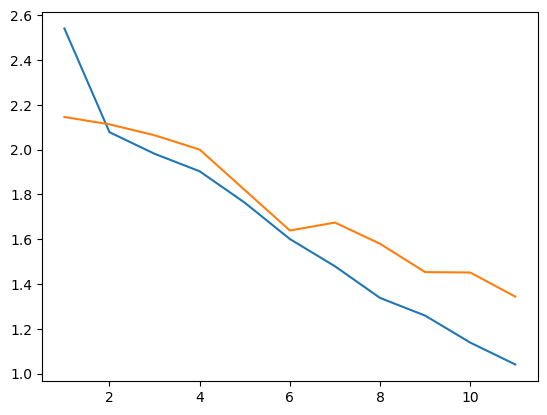

In [88]:
import matplotlib.pyplot as plt
plt.plot(range(1,12),history.history['loss'],label='train')
plt.plot(range(1,12),history.history['val_loss'],label='test')

In [184]:
image= cv2.imread(r"C:\Users\Hello\Deep Learning\CNN\data_1\data\class_10_val\test_images\val_6370.JPEG")


In [185]:
image.shape

(64, 64, 3)

In [186]:
test_image = image[np.newaxis]

In [187]:
test_image.shape

(1, 64, 64, 3)

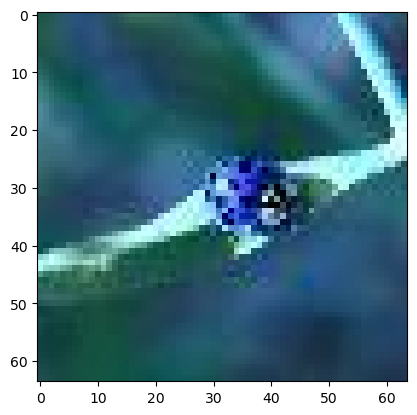

In [188]:
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


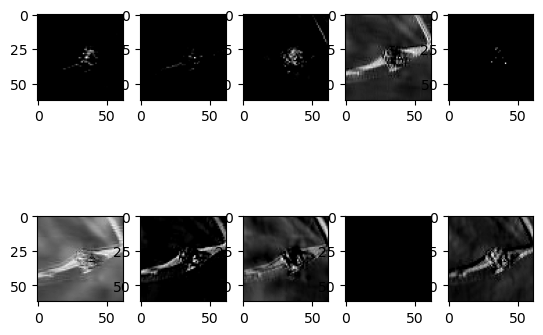

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


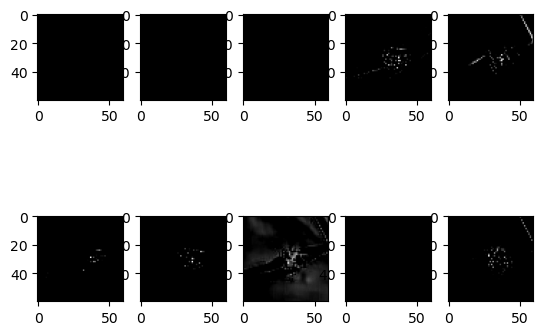

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


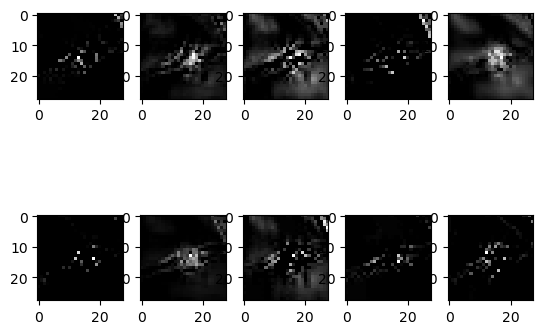

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


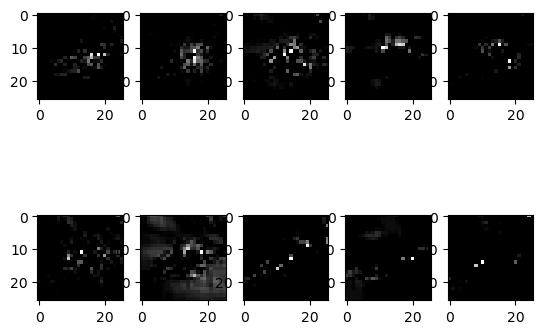

In [189]:
import matplotlib.pyplot as plt
for z in [0,1,3,4]:
    c1 = Model(inputs=model.inputs, outputs=model.layers[z].output)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.imshow(c1.predict(test_image)[0][:,:,i-1],cmap='gray')
    plt.show()


In [190]:
a=np.argmax(model.predict(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [191]:
encode.inverse_transform([a])

array(['ladybug'], dtype='<U12')

In [108]:
labels

,n03662601,n02165456,n07873807,n07720875,n04146614,n01882714,n07920052,n02509815,n07747607,n04285008
class,lifeboat,ladybug,pizza,bell pepper,school bus,koala bear,espresso,lesser panda,orange,sports car
index,0,1,2,3,4,5,6,7,8,9


In [192]:
model.save("image_classification_without_augmantation.h5")

In [194]:
from keras.models import load_model

In [196]:
Model_loaded = load_model("image_classification_without_augmantation.h5")

In [198]:
Model_loaded.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │          84,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,792 (346.85 KB)

 Trainable params: 88,790 (346.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [201]:
np.argmax(Model_loaded.predict(test_image)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


3

In [203]:
encode.inverse_transform([3])

array(['ladybug'], dtype='<U12')

In [205]:
encode.inverse_transform([0,1,2,3,4,5,6,7,8,9]
                         )

array(['bell pepper', 'espresso', 'koala bear', 'ladybug', 'lesser panda',
       'lifeboat', 'orange', 'pizza', 'school bus', 'sports car'],
      dtype='<U12')

In [208]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = encode.inverse_transform(values)

# Create a dictionary
dict = dict(zip(values, labels))


In [210]:
dict

{0: 'bell pepper',
 1: 'espresso',
 2: 'koala bear',
 3: 'ladybug',
 4: 'lesser panda',
 5: 'lifeboat',
 6: 'orange',
 7: 'pizza',
 8: 'school bus',
 9: 'sports car'}